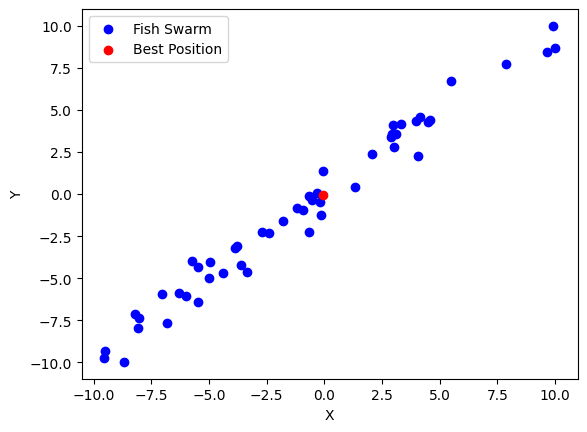

In [10]:
import numpy as np
import matplotlib.pyplot as plt

class FishSwarm:
    def __init__(self, num_fish, num_dimensions, lower_bounds, upper_bounds):
        self.num_fish = num_fish
        self.num_dimensions = num_dimensions
        self.lower_bounds = lower_bounds
        self.upper_bounds = upper_bounds
        self.positions = self.initialize_positions()
        self.best_position = None
        self.best_fitness = float('inf')

    def initialize_positions(self):
        positions = np.zeros((self.num_fish, self.num_dimensions))
        for i in range(self.num_fish):
            positions[i] = np.random.uniform(self.lower_bounds, self.upper_bounds)
        return positions

    def evaluate_fitness(self, position):
        # Modify this function according to your optimization problem
        # Here, we assume a simple fitness function that sums the squared values of the position
        return np.sum(position ** 2)

    def update_swarm(self, step_size):
        for i in range(self.num_fish):
            current_position = self.positions[i]
            current_fitness = self.evaluate_fitness(current_position)

            # Update the best position and fitness if necessary
            if current_fitness < self.best_fitness:
                self.best_position = current_position.copy()
                self.best_fitness = current_fitness

            # Update the position of the fish
            perturbation = np.random.uniform(-1, 1, self.num_dimensions)
            new_position = current_position + step_size * perturbation
            new_position = np.clip(new_position, self.lower_bounds, self.upper_bounds)

            # Update the fish's position and fitness
            self.positions[i] = new_position

    def optimize(self, num_iterations, step_size):
        for _ in range(num_iterations):
            self.update_swarm(step_size)

        return self.best_position, self.best_fitness

# Set up the problem dimensions and bounds
num_fish = 50
num_dimensions = 2
lower_bounds = -10
upper_bounds = 10

# Set up the Fish Swarm Optimization
fso = FishSwarm(num_fish, num_dimensions, lower_bounds, upper_bounds)

# Optimize the problem
best_position, best_fitness = fso.optimize(num_iterations=100, step_size=0.1)

# Visualize the fish swarm and the best position found
fig, ax = plt.subplots()
ax.scatter(fso.positions[:, 0], fso.positions[:, 1], c='b', label='Fish Swarm')
ax.scatter(best_position[0], best_position[1], c='r', label='Best Position')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
plt.show()
